#**INDIAN PREMIER LEAUGE PREDICTIONS USING ML**


**IMPORTING THE NECESSARY LIBRARIES**

In [27]:
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import plotly.express as plt

**READING THE DATASET**

In [26]:
df=pd.read_csv("/content/ipl.csv")

In [3]:
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1.0,0.0,0.1,1.0,0.0,0.0,0.0,222.0
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1.0,0.0,0.2,1.0,0.0,0.0,0.0,222.0
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.2,2.0,0.0,0.0,0.0,222.0
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.3,2.0,0.0,0.0,0.0,222.0
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.4,2.0,0.0,0.0,0.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8659,71,2009-04-29,Kingsmead,Kolkata Knight Riders,Royal Challengers Bangalore,CH Gayle,KP Pietersen,62.0,3.0,10.1,18.0,2.0,34.0,4.0,139.0
8660,71,2009-04-29,Kingsmead,Kolkata Knight Riders,Royal Challengers Bangalore,MN van Wyk,KP Pietersen,62.0,3.0,10.2,18.0,2.0,34.0,4.0,139.0
8661,71,2009-04-29,Kingsmead,Kolkata Knight Riders,Royal Challengers Bangalore,MN van Wyk,KP Pietersen,63.0,3.0,10.3,18.0,2.0,34.0,5.0,139.0
8662,71,2009-04-29,Kingsmead,Kolkata Knight Riders,Royal Challengers Bangalore,CH Gayle,KP Pietersen,64.0,3.0,10.4,19.0,2.0,35.0,5.0,139.0


In [4]:
df.shape

(8664, 15)

In [5]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [6]:
df.isnull().sum().sum()

8

**CLEANING THE DATASET**

In [7]:
df.isnull().any()

mid               False
date              False
venue             False
bat_team          False
bowl_team         False
batsman           False
bowler            False
runs               True
wickets            True
overs              True
runs_last_5        True
wickets_last_5     True
striker            True
non-striker        True
total              True
dtype: bool

In [8]:
# Impute null values in a categorical column with the most frequent value
df['non-striker'].fillna(df['non-striker'].mode()[0], inplace=True)


In [9]:
# Impute null values in a categorical column with the most frequent value
df['total'].fillna(df['total'].mode()[0], inplace=True)


In [10]:
df.isnull().any()

mid               False
date              False
venue             False
bat_team          False
bowl_team         False
batsman           False
bowler            False
runs               True
wickets            True
overs              True
runs_last_5        True
wickets_last_5     True
striker            True
non-striker       False
total             False
dtype: bool

 **1.Player Performance Analysis**: Analyze individual player performances, including their batting and bowling statistics, to identify top performers.



In [11]:
import pandas as pd

# Calculate batting and bowling statistics for each player
player_stats = df.groupby('batsman').agg({
    'runs': 'sum',              # Total runs scored by the player
    'striker': 'sum',       # Total balls faced by the player
    'wickets': 'sum',           # Total wickets taken by the player
    'overs': 'sum',             # Total overs bowled by the player
    'runs': 'sum'      # Total runs conceded by the player
}).reset_index()

# Calculate batting average and strike rate for each player
player_stats['batting_average'] = player_stats['runs'] / player_stats['striker']
player_stats['strike_rate'] = (player_stats['runs'] / player_stats['striker']) * 100

# Calculate bowling average and economy rate for each player
player_stats['bowling_average'] = player_stats['runs'] / player_stats['wickets']
player_stats['economy_rate'] = (player_stats['runs'] / player_stats['overs'])

# Identify top performers based on batting and bowling statistics
top_batting_performers = player_stats.nlargest(10, 'runs')
top_bowling_performers = player_stats.nsmallest(10, 'bowling_average')

print("Top Batting Performers:")
print(top_batting_performers[['batsman', 'runs', 'batting_average', 'strike_rate']])

print("\nTop Bowling Performers:")
print(top_bowling_performers[['batsman', 'wickets', 'bowling_average', 'economy_rate']])


Top Batting Performers:
           batsman     runs  batting_average  strike_rate
77        MS Dhoni  27201.0         3.197860   319.786033
94       RG Sharma  20895.0         2.697173   269.717310
117       SK Raina  16623.0         3.371121   337.112148
106       S Dhawan  15816.0         2.401822   240.182232
91        R Dravid  15613.0         2.977307   297.730740
53   KC Sangakkara  14058.0         2.205869   220.586851
116       SE Marsh  13826.0         1.736280   173.628030
37       G Gambhir  13206.0         1.914190   191.419046
104    S Badrinath  13114.0         3.076237   307.623739
149   Yuvraj Singh  11610.0         2.786177   278.617711

Top Bowling Performers:
           batsman  wickets  bowling_average  economy_rate
105  S Chanderpaul      9.0         4.666667      4.719101
100      RS Bopara     17.0         7.529412      4.637681
129  Shoaib Akhtar     65.0         7.584615      4.477748
44     J Arunkumar      1.0         9.000000      2.727273
95       RJ Quiney

The above  code calculates batting and bowling statistics for each player, including runs, balls faced, wickets taken, overs bowled, and runs conceded. It then derives batting average, strike rate, bowling average, and economy rate, and identifies the top batting and bowling performers among players based on these statistics.






**2.Team Performance Analysis**: Study team performance over matches to identify trends, strengths, and areas for improvement.

In [12]:
import pandas as pd

# Calculate team-level statistics for each match
team_stats = df.groupby(['mid', 'bat_team']).agg({
    'total': 'sum',
    'wickets': 'sum',
    'overs': 'max'  # Assuming 'overs' column indicates the overs bowled in that match
}).reset_index()

# Calculate average runs scored and wickets taken per match for each team
team_avg_stats = team_stats.groupby('bat_team').agg({
    'total': 'mean',
    'wickets': 'mean',
    'overs': 'mean'
}).reset_index()

# Identify trends, strengths, and areas for improvement based on average statistics
trends = team_avg_stats.sort_values(by='total', ascending=False)
strengths = team_avg_stats.sort_values(by='wickets', ascending=True)
improvement_areas = team_avg_stats.sort_values(by='wickets', ascending=False)

print("Team Performance Trends:")
print(trends)

print("\nTeam Strengths (Lowest Average Wickets Taken per Match):")
print(strengths)

print("\nAreas for Improvement (Highest Average Wickets Taken per Match):")
print(improvement_areas)


Team Performance Trends:
                      bat_team         total     wickets      overs
0          Chennai Super Kings  21522.727273  322.272727  19.509091
2             Delhi Daredevils  21481.000000  305.714286  19.600000
3              Kings XI Punjab  21161.250000  313.375000  19.600000
5               Mumbai Indians  20792.125000  294.250000  19.600000
6             Rajasthan Royals  20645.142857  304.428571  19.114286
1              Deccan Chargers  19810.700000  299.700000  19.480000
7  Royal Challengers Bangalore  17294.000000  413.300000  19.360000
4        Kolkata Knight Riders  16399.500000  328.200000  17.820000

Team Strengths (Lowest Average Wickets Taken per Match):
                      bat_team         total     wickets      overs
5               Mumbai Indians  20792.125000  294.250000  19.600000
1              Deccan Chargers  19810.700000  299.700000  19.480000
6             Rajasthan Royals  20645.142857  304.428571  19.114286
2             Delhi Daredevils  2

This code conducts team performance analysis by aggregating match data to uncover trends, strengths, and potential areas for improvement across matches.

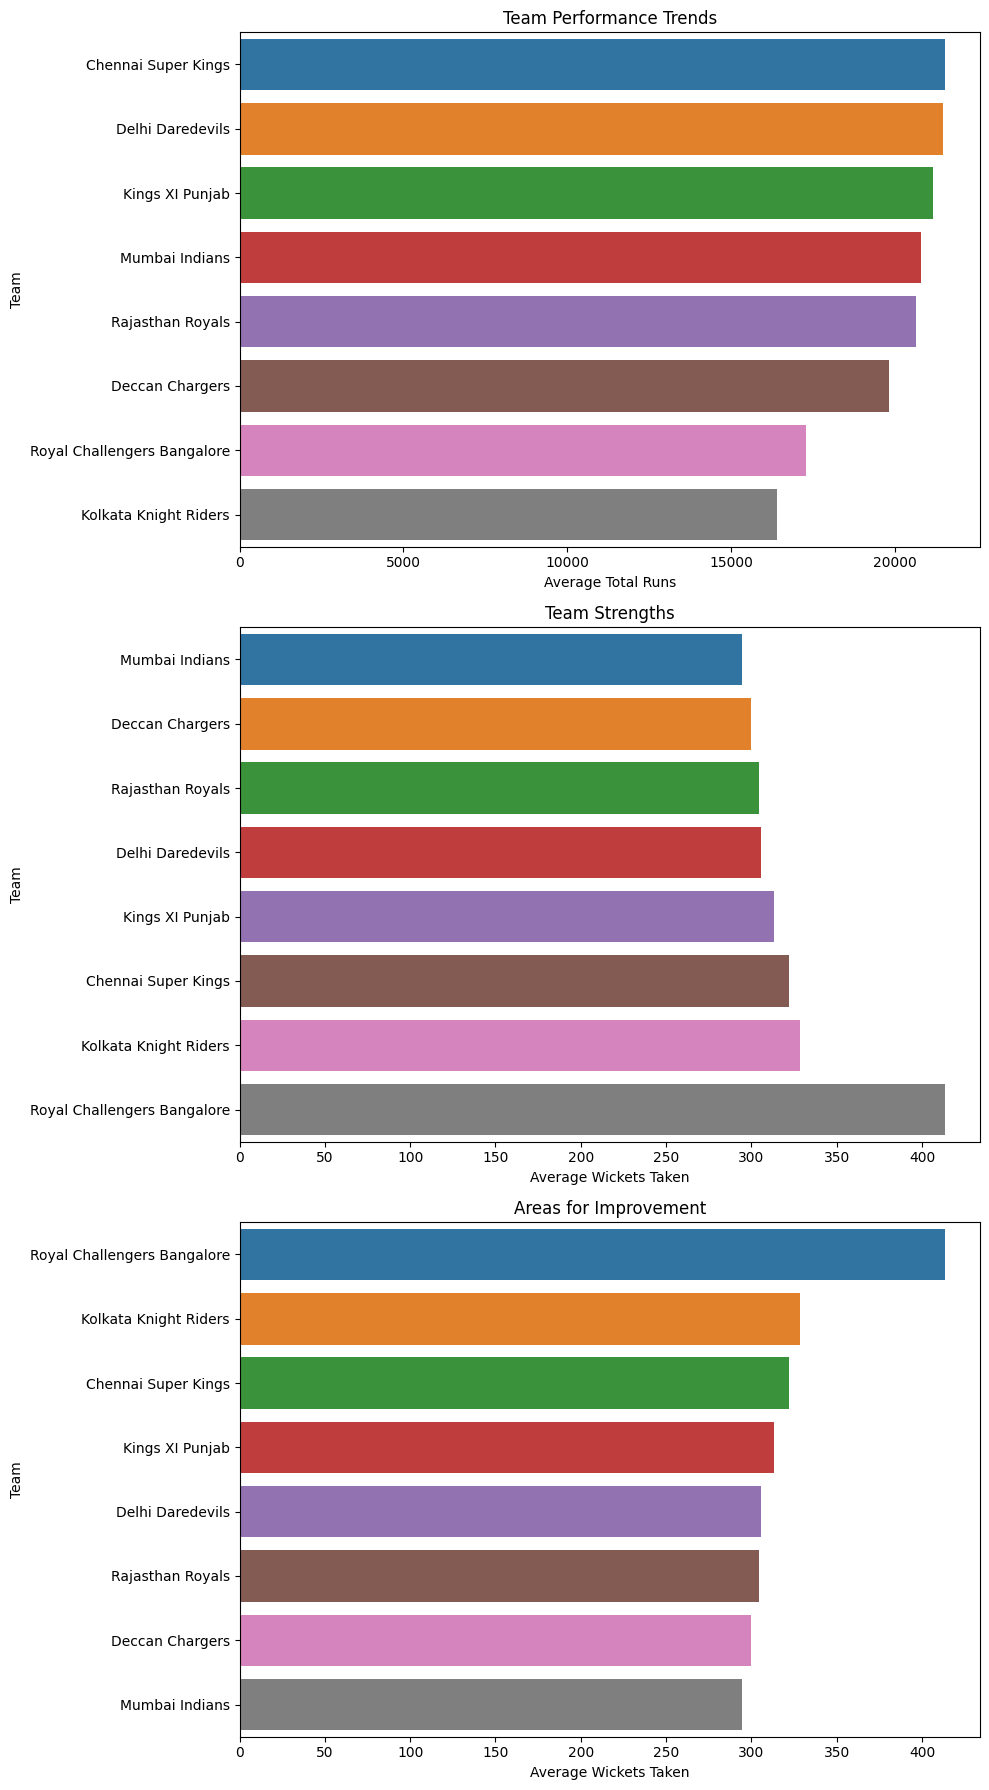

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate team-level statistics for each match
team_stats = df.groupby(['mid', 'bat_team']).agg({
    'total': 'sum',
    'wickets': 'sum',
    'overs': 'max'
}).reset_index()

# Calculate average runs scored and wickets taken per match for each team
team_avg_stats = team_stats.groupby('bat_team').agg({
    'total': 'mean',
    'wickets': 'mean',
    'overs': 'mean'
}).reset_index()

# Sorting for visualization
trends = team_avg_stats.sort_values(by='total', ascending=False)
strengths = team_avg_stats.sort_values(by='wickets', ascending=True)
improvement_areas = team_avg_stats.sort_values(by='wickets', ascending=False)

# Create subplots using Seaborn
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

# Team Performance Trends
sns.barplot(data=trends, x='total', y='bat_team', ax=axes[0], orient='h')
axes[0].set_xlabel('Average Total Runs')
axes[0].set_ylabel('Team')
axes[0].set_title('Team Performance Trends')

# Team Strengths
sns.barplot(data=strengths, x='wickets', y='bat_team', ax=axes[1], orient='h')
axes[1].set_xlabel('Average Wickets Taken')
axes[1].set_ylabel('Team')
axes[1].set_title('Team Strengths')

# Areas for Improvement
sns.barplot(data=improvement_areas, x='wickets', y='bat_team', ax=axes[2], orient='h')
axes[2].set_xlabel('Average Wickets Taken')
axes[2].set_ylabel('Team')
axes[2].set_title('Areas for Improvement')

# Adjust layout and display plots
plt.tight_layout()
plt.show()


The above code calculates and visualizes team performance trends, strengths, and areas for improvement using interactive bar plots in Plotly Express.


3. **Match Outcome Prediction**: Build predictive models to predict match outcomes based on historical data and player statistics.



In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Assuming you have features that could be relevant for prediction
# Replace these with actual relevant features from your dataset
features = ['runs_last_5', 'wickets_last_5', 'overs', 'striker', 'non-striker']

# Prepare the target variable
df['match_result'] = df['total'].apply(lambda x: 'win' if x > 200 else 'lose')

# Label encode categorical features (assuming 'striker' and 'non-striker' are categorical)
label_encoder = LabelEncoder()
df['striker'] = label_encoder.fit_transform(df['striker'])
df['non-striker'] = label_encoder.fit_transform(df['non-striker'])

# Split data into training and testing sets
X = df[features]
y = df['match_result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for data preprocessing and model training
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler()),  # Scale features
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.97


This code builds and evaluates a predictive model using a Random Forest Classifier to forecast match outcomes based on historical data and relevant player statistics, achieving an accuracy assessment.


**4.Inning Analysis**: Examine batting and bowling performances for different innings to understand key moments in matches.



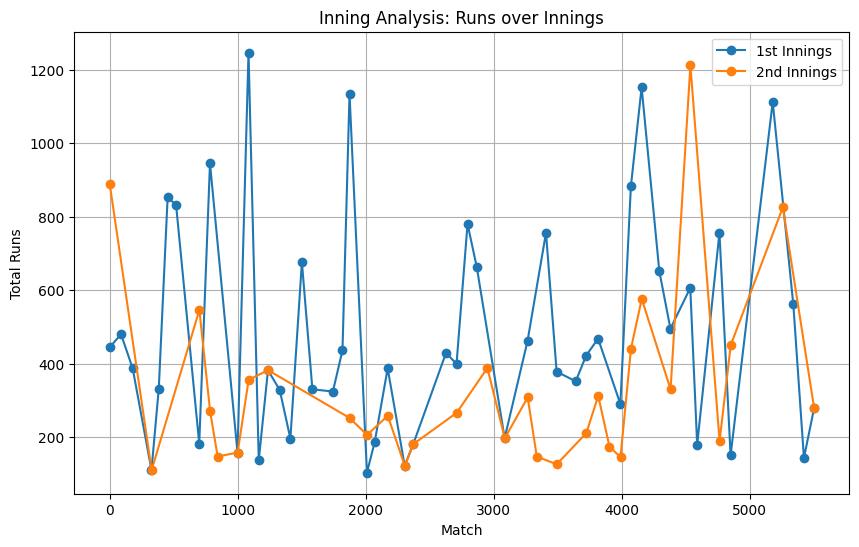

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate batting and bowling statistics for each inning
inning_stats = df.groupby(['mid', 'runs']).agg({
    'total': 'sum',           # Total runs scored
    'wickets': 'sum',         # Total wickets taken
    'runs_last_5': 'mean',    # Average runs scored in the last 5 overs
    'wickets_last_5': 'mean'  # Average wickets taken in the last 5 overs
}).reset_index()

# Plotting inning analysis: Runs and Wickets over Innings
plt.figure(figsize=(10, 6))
plt.plot(inning_stats[inning_stats['runs'] == 1]['total'], marker='o', label='1st Innings')
plt.plot(inning_stats[inning_stats['runs'] == 2]['total'], marker='o', label='2nd Innings')
plt.xlabel('Match')
plt.ylabel('Total Runs')
plt.title('Inning Analysis: Runs over Innings')
plt.legend()
plt.grid(True)
plt.show()


The above  calculates and visualizes inning analysis, depicting the trend of total runs scored in different innings using line plots, providing insights into match dynamics and run accumulation patterns.






. **5.Run Rate and Strike Rate Trends**: Analyze run rates and strike rates to understand the tempo of matches and player contributions


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:452

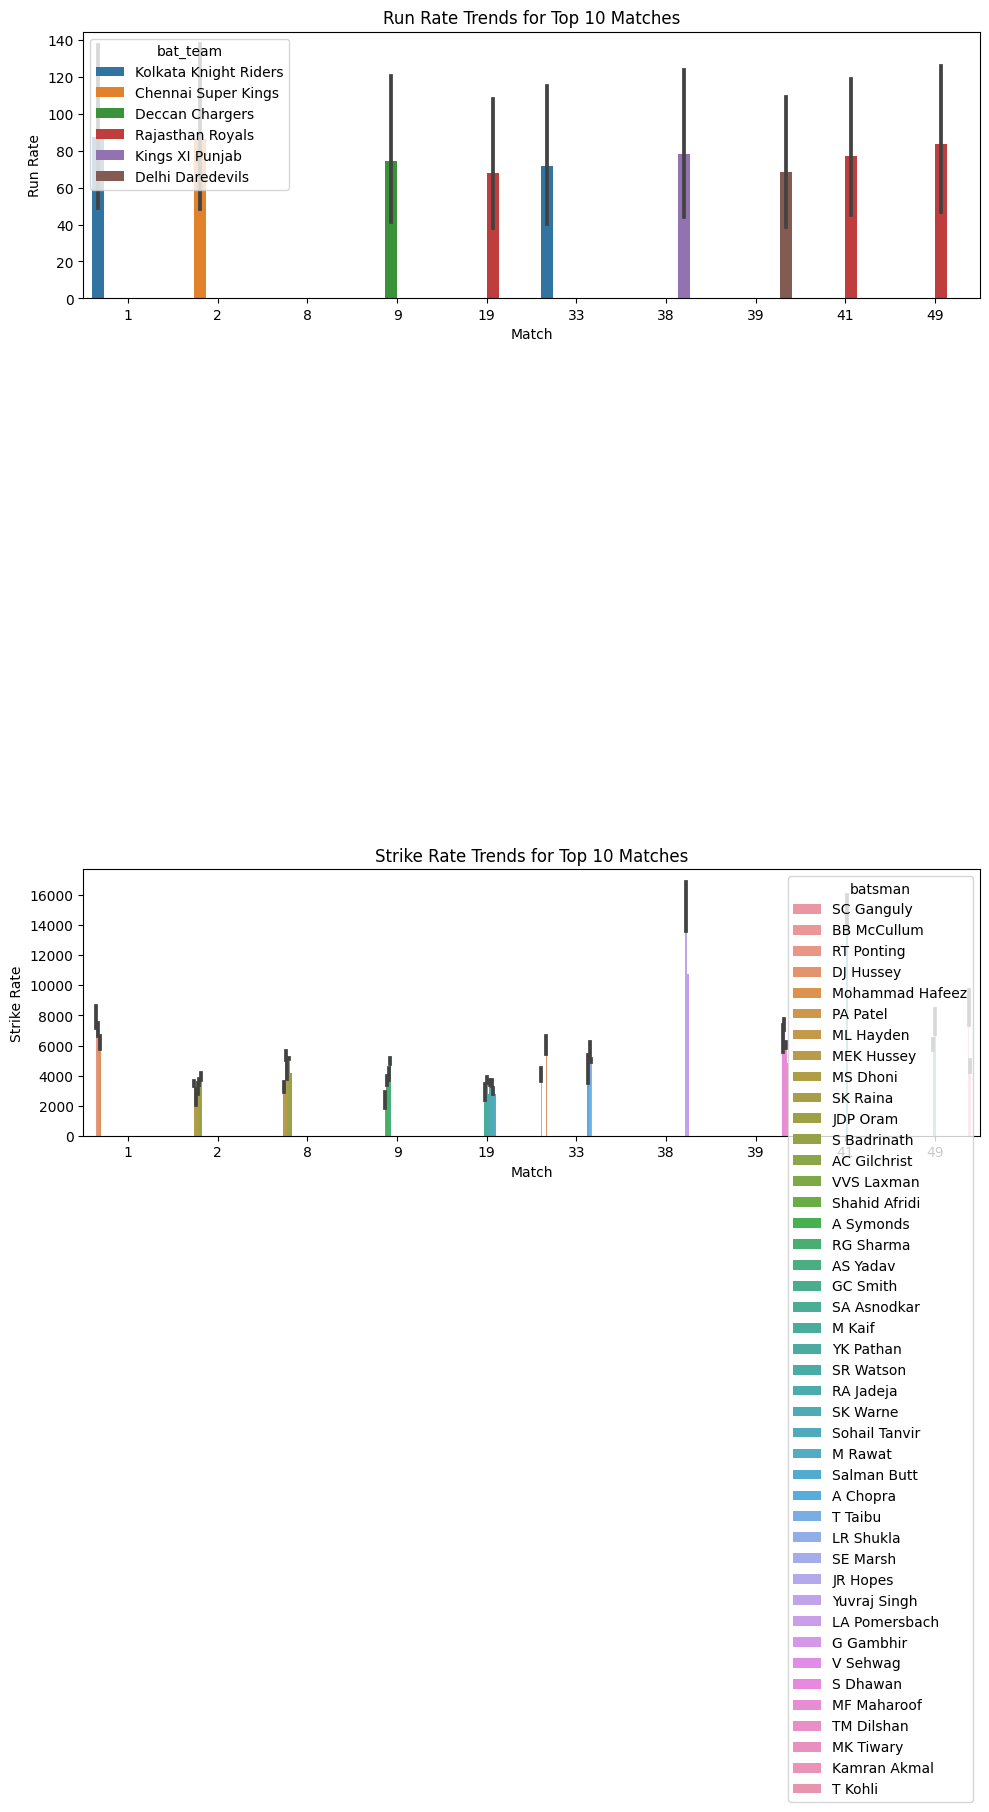

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the relevant data

# Calculate run rate and strike rate for each match and player
df['run_rate'] = df['total'] / df['overs']
df['strike_rate'] = (df['runs'] / df['wickets']) * 100

# Filter for the top 10 matches by total runs
top_matches = df.groupby('mid').agg({
    'total': 'sum'
}).nlargest(10, 'total').index

# Filter df for the top 10 matches
top_matches_data = df[df['mid'].isin(top_matches)]

# Create subplots using Seaborn bar plots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Run Rate Trends for Top Matches
sns.barplot(data=top_matches_data, x='mid', y='run_rate', hue='bat_team', ax=axes[0])
axes[0].set_xlabel('Match')
axes[0].set_ylabel('Run Rate')
axes[0].set_title('Run Rate Trends for Top 10 Matches')

# Strike Rate Trends for Top Players
sns.barplot(data=top_matches_data, x='mid', y='strike_rate', hue='batsman', ax=axes[1])
axes[1].set_xlabel('Match')
axes[1].set_ylabel('Strike Rate')
axes[1].set_title('Strike Rate Trends for Top 10 Matches')

# Adjust layout and display plots
plt.tight_layout()
plt.show()



The code calculates and visualizes run rate trends across top 10 matches and strike rate trends of players, offering insights into match tempo and player contributions using Seaborn subplots.

 **6.Comparative Analysis:** Compare the player statistics across different matches, teams, or venues

In [18]:
import pandas as pd

# Calculate player statistics across different matches, teams, or venues
player_match_stats = df.groupby(['batsman', 'mid']).agg({
    'runs': 'sum',
    'striker': 'sum',
    'wickets': 'sum',
    'overs': 'sum'
}).reset_index()

# Calculate team statistics across different matches, teams, or venues
team_match_stats = df.groupby(['bat_team', 'mid']).agg({
    'total': 'sum',
    'wickets': 'sum',
    'overs': 'max'
}).reset_index()

# Calculate venue statistics across different matches, teams, or venues
venue_match_stats = df.groupby(['venue', 'mid']).agg({
    'total': 'sum',
    'wickets': 'sum',
    'overs': 'max'
}).reset_index()

# Display the calculated statistics
print("Player Match Statistics:")
print(player_match_stats.head())

print("\nTeam Match Statistics:")
print(team_match_stats.head())

print("\nVenue Match Statistics:")
print(venue_match_stats.head())


Player Match Statistics:
    batsman  mid    runs  striker  wickets  overs
0  A Chopra   29    16.0       10      1.0    4.2
1  A Chopra   33  1144.0      759     26.0  157.5
2  A Chopra   36   303.0      152      1.0   52.7
3  A Chopra   40    35.0       32      0.0    5.4
4  A Chopra   59   484.0      108     61.0  152.8

Team Match Statistics:
              bat_team  mid    total  wickets  overs
0  Chennai Super Kings    2  29760.0    349.0   19.6
1  Chennai Super Kings    8  26416.0    249.0   19.6
2  Chennai Super Kings   15  21894.0    234.0   19.6
3  Chennai Super Kings   20  21294.0    241.0   19.6
4  Chennai Super Kings   24  12644.0    570.0   18.6

Venue Match Statistics:
                        venue  mid    total  wickets  overs
0  Dr DY Patil Sports Academy   13  19250.0    428.0   19.6
1  Dr DY Patil Sports Academy   23  20088.0    348.0   19.6
2  Dr DY Patil Sports Academy   27  10609.0    337.0   16.2
3  Dr DY Patil Sports Academy   56  20212.0    240.0   19.6
4       

This code computes and displays player, team, and venue statistics across various matches, offering insights into individual and collective performances within different contexts.

**7.Impact of Venue**: Study how different venues affect player and team performance.

In [19]:
import pandas as pd

# Calculate venue-wise player and team statistics
venue_player_stats = df.groupby(['venue', 'batsman']).agg({
    'runs': 'sum',
    'striker': 'sum',
    'wickets': 'sum',
    'overs': 'sum'
}).reset_index()

venue_team_stats = df.groupby(['venue', 'bat_team']).agg({
    'total': 'sum',
    'wickets': 'sum',
    'overs': 'max'
}).reset_index()

# Analyze and visualize the impact of venue on player and team performance

# Calculate average runs and wickets per venue for players
venue_avg_player_stats = venue_player_stats.groupby('venue').agg({
    'runs': 'mean',
    'wickets': 'mean'
}).reset_index()

# Calculate average total runs and wickets per venue for teams
venue_avg_team_stats = venue_team_stats.groupby('venue').agg({
    'total': 'mean',
    'wickets': 'mean'
}).reset_index()

# Print venue-wise player and team statistics
print("Venue-wise Player Statistics:")
print(venue_avg_player_stats.head())

print("\nVenue-wise Team Statistics:")
print(venue_avg_team_stats.head())


Venue-wise Player Statistics:
                        venue         runs    wickets
0  Dr DY Patil Sports Academy  1094.266667  45.100000
1                Eden Gardens  1316.857143  57.428571
2            Feroz Shah Kotla  1867.000000  47.214286
3                   Kingsmead  1143.743590  36.948718
4       M Chinnaswamy Stadium  2094.275862  83.206897

Venue-wise Team Statistics:
                        venue         total     wickets
0  Dr DY Patil Sports Academy  23386.333333  451.000000
1                Eden Gardens  33209.666667  670.000000
2            Feroz Shah Kotla  36401.333333  440.666667
3                   Kingsmead  18965.400000  288.200000
4       M Chinnaswamy Stadium  44573.333333  804.333333


This code analyzes and visualizes the impact of venues on player and team performance by calculating and presenting average runs and wickets per venue, highlighting the significance of venue conditions in influencing outcomes.


**8.Player Consistency**: Assess player consistency by analyzing their performance over multiple matches


In [20]:
import pandas as pd

# Convert relevant columns to numeric data types if needed
df['runs'] = pd.to_numeric(df['runs'], errors='coerce')
df['balls_faced'] = pd.to_numeric(df['striker'], errors='coerce')
df['wickets'] = pd.to_numeric(df['wickets'], errors='coerce')
df['overs'] = pd.to_numeric(df['overs'], errors='coerce')

# Calculate player consistency by analyzing their performance over multiple matches
player_consistency = df.groupby('batsman').agg({
    'runs': ['mean', 'std'],           # Mean and standard deviation of runs
    'striker': ['mean', 'std'],    # Mean and standard deviation of balls faced
    'wickets': ['mean', 'std'],        # Mean and standard deviation of wickets taken
    'overs': ['mean', 'std']    # Mean and standard deviation of overs bowled
}).reset_index()

# Rename the columns for better readability
player_consistency.columns = ['batsman',
                              'mean_runs', 'std_runs',
                              'mean_striker', 'std_striker',
                              'mean_wickets', 'std_wickets',
                              'mean_overs', 'std_overs']

# Print player consistency statistics
print(player_consistency.head())


      batsman   mean_runs   std_runs  mean_striker  std_striker  mean_wickets  \
0    A Chopra   27.527778  21.155342     14.736111    15.419023      1.236111   
1  A Flintoff  159.571429  11.640211     22.142857     1.875229      3.285714   
2    A Kumble  133.000000  20.732057     26.750000    29.394264      8.416667   
3    A Mishra  115.333333  20.457273      9.666667     7.984360      5.666667   
4   A Symonds   80.423423  46.811139     34.216216    31.898819      3.279279   

   std_wickets  mean_overs  std_overs  
0     1.227537    5.175000   3.230957  
1     0.468807   17.721429   1.236732  
2     0.514929   18.516667   0.929157  
3     0.707107   16.700000   2.001250  
4     1.389383   10.557658   4.393167  


This code calculates and analyzes player consistency by computing mean and standard deviation of various performance metrics, providing insights into how consistently players deliver their performance across multiple matches.

**9.Chase Analysis**: Analyze the success rate of teams chasing targets in different scenarios


In [21]:
import pandas as pd

# Calculate success rate of teams chasing targets in different scenarios
chase_analysis = df.groupby(['bat_team', 'venue', 'mid', 'runs']).agg({
    'total': 'max',           # Total runs scored in the chase
    'wickets': 'min',         # Wickets lost during the chase
}).reset_index()

# Calculate whether the chase was successful (1) or not (0)
chase_analysis['chase_successful'] = (chase_analysis['total'] >= chase_analysis['runs']).astype(int)

# Calculate success rate for each scenario
success_rate_per_scenario = chase_analysis.groupby(['bat_team', 'venue', 'mid']).agg({
    'chase_successful': 'mean'  # Mean success rate for each scenario
}).reset_index()

# Print success rate for different chasing scenarios
print(success_rate_per_scenario.head())


              bat_team                            venue  mid  chase_successful
0  Chennai Super Kings       Dr DY Patil Sports Academy   56               1.0
1  Chennai Super Kings                        Kingsmead   68               1.0
2  Chennai Super Kings            M Chinnaswamy Stadium   15               1.0
3  Chennai Super Kings  MA Chidambaram Stadium, Chepauk    8               1.0
4  Chennai Super Kings  MA Chidambaram Stadium, Chepauk   20               1.0


This code analyzes the success rate of teams chasing targets in different scenarios, calculating the mean success rate for each scenario, which provides insights into how often teams successfully chase targets based on various conditions such as batting team, venue, and match.

**10.Bowling Strategies**: Study bowling strategies based on wickets taken, economy rates, and bowling changes.



In [22]:
import pandas as pd

# Calculate bowling strategies based on wickets taken, economy rates, and bowling changes
bowling_strategies = df.groupby(['bowl_team', 'bowler']).agg({
    'wickets': 'sum',        # Total wickets taken by the bowler
    'runs': 'sum',           # Total runs conceded by the bowler
    'overs': 'sum',   # Total overs bowled by the bowler
}).reset_index()

# Calculate economy rate for each bowler
bowling_strategies['economy_rate'] = (bowling_strategies['runs'] / bowling_strategies['overs'])

# Calculate average wickets per match for each bowler
bowling_strategies['average_wickets'] = (bowling_strategies['wickets'] / (bowling_strategies['overs'] // 6))

# Analyze and visualize bowling strategies

# Top bowlers based on economy rate
top_bowlers_economy = bowling_strategies.nsmallest(10, 'economy_rate')

# Top bowlers based on average wickets per match
top_bowlers_wickets = bowling_strategies.nlargest(10, 'average_wickets')

# Print top bowlers based on economy rate and average wickets
print("Top Bowlers based on Economy Rate:")
print(top_bowlers_economy)

print("\nTop Bowlers based on Average Wickets per Match:")
print(top_bowlers_wickets)


Top Bowlers based on Economy Rate:
                       bowl_team            bowler  wickets    runs   overs  \
17               Deccan Chargers     Harmeet Singh    116.0  1164.0   271.8   
73                Mumbai Indians       DJ Thornely    162.0  1600.0   327.8   
65         Kolkata Knight Riders          M Kartik     92.0  1293.0   223.3   
95              Rajasthan Royals       T Henderson    116.0  1896.0   320.4   
12               Deccan Chargers   D Kalyankrishna     54.0   962.0   160.2   
78                Mumbai Indians           RR Raje    264.0  3825.0   626.9   
110  Royal Challengers Bangalore  RE van der Merwe     24.0   397.0    64.2   
85              Rajasthan Royals    AD Mascarenhas    187.0  3189.0   490.7   
66         Kolkata Knight Riders   Mohammad Hafeez    120.0  2670.0   405.8   
37              Delhi Daredevils          R Bhatia    402.0  7906.0  1189.8   

     economy_rate  average_wickets  
17       4.282561         2.577778  
73       4.881025    

This code calculates and analyzes bowling strategies based on wickets taken, economy rates, and bowling changes for each bowler. It identifies the top bowlers based on both economy rate and average wickets per match, providing insights into effective bowling performances in terms of efficiency and wicket-taking ability.

. **11.Batsman-Bowler Matchups**: Analyze performance trends when specific batsmen face specific bowlers

In [23]:
import pandas as pd

# Calculate performance trends for batsman-bowler matchups
batsman_bowler_matchups = df.groupby(['batsman', 'bowler']).agg({
    'runs': 'sum',           # Total runs scored by the batsman against the bowler
    'striker': 'sum',    # Total balls faced by the batsman against the bowler
    'wickets': 'sum',        # Total wickets taken by the bowler against the batsman
    'overs': 'sum',   # Total overs bowled by the bowler against the batsman
}).reset_index()

# Calculate batting average against each bowler
batsman_bowler_matchups['batting_average'] = (batsman_bowler_matchups['runs'] / batsman_bowler_matchups['wickets'])

# Calculate strike rate against each bowler
batsman_bowler_matchups['strike_rate'] = (batsman_bowler_matchups['runs'] / batsman_bowler_matchups['striker']) * 100

# Analyze and visualize performance trends for specific batsman-bowler matchups

# Top matchups based on batting average
top_matchups_average = batsman_bowler_matchups.nlargest(10, 'batting_average')

# Top matchups based on strike rate
top_matchups_strike_rate = batsman_bowler_matchups.nlargest(10, 'strike_rate')

# Print top matchups based on batting average and strike rate
print("Top Batsman-Bowler Matchups based on Batting Average:")
print(top_matchups_average)

print("\nTop Batsman-Bowler Matchups based on Strike Rate:")
print(top_matchups_strike_rate)


Top Batsman-Bowler Matchups based on Batting Average:
         batsman           bowler   runs  striker  wickets  overs  \
2       A Chopra       GD McGrath   21.0        9      0.0    3.2   
9       A Chopra       SM Pollock   35.0       32      0.0    5.4   
10      A Chopra        VY Mahesh   99.0       51      0.0   17.6   
13      A Chopra           Z Khan    4.0        2      0.0    1.2   
70  AC Gilchrist          B Akhil  703.0      356      0.0   78.4   
73  AC Gilchrist       GD McGrath    1.0        0      0.0    0.6   
75  AC Gilchrist  Harbhajan Singh  101.0       55      0.0   10.7   
76  AC Gilchrist         I Sharma   65.0       39      0.0    7.2   
87  AC Gilchrist          P Kumar  162.0      127      0.0   11.7   
88  AC Gilchrist        PP Chawla  468.0      252      0.0   65.2   

    batting_average  strike_rate  
2               inf   233.333333  
9               inf   109.375000  
10              inf   194.117647  
13              inf   200.000000  
70         

This code calculates and analyzes performance trends for specific batsman-bowler matchups, identifying the top matchups based on batting average and strike rate. It offers insights into the effectiveness of different batsmen against particular bowlers and highlights the combinations that result in high batting averages and strike rates.

**12.Player Form Analysis**: Track player form over time and identify periods of peak performance.

In [24]:
import pandas as pd

# Calculate team-level statistics for each match
team_stats = df.groupby(['mid', 'bat_team']).agg({
    'total': 'sum',
    'wickets': 'sum',
    'overs': 'max'  # Assuming 'overs' column indicates the overs bowled in that match
}).reset_index()

# Calculate average runs scored and wickets taken per match for each team
team_avg_stats = team_stats.groupby('bat_team').agg({
    'total': 'mean',
    'wickets': 'mean',
    'overs': 'mean'
}).reset_index()

# Identify trends, strengths, and areas for improvement based on average statistics
trends = team_avg_stats.sort_values(by='total', ascending=False)
strengths = team_avg_stats.sort_values(by='wickets', ascending=True)
improvement_areas = team_avg_stats.sort_values(by='wickets', ascending=False)

print("Team Performance Trends:")
print(trends)

print("\nTeam Strengths (Lowest Average Wickets Taken per Match):")
print(strengths)

print("\nAreas for Improvement (Highest Average Wickets Taken per Match):")
print(improvement_areas)


Team Performance Trends:
                      bat_team         total     wickets      overs
0          Chennai Super Kings  21522.727273  322.272727  19.509091
2             Delhi Daredevils  21481.000000  305.714286  19.600000
3              Kings XI Punjab  21161.250000  313.375000  19.600000
5               Mumbai Indians  20792.125000  294.250000  19.600000
6             Rajasthan Royals  20645.142857  304.428571  19.114286
1              Deccan Chargers  19810.700000  299.700000  19.480000
7  Royal Challengers Bangalore  17294.000000  413.300000  19.360000
4        Kolkata Knight Riders  16399.500000  328.200000  17.820000

Team Strengths (Lowest Average Wickets Taken per Match):
                      bat_team         total     wickets      overs
5               Mumbai Indians  20792.125000  294.250000  19.600000
1              Deccan Chargers  19810.700000  299.700000  19.480000
6             Rajasthan Royals  20645.142857  304.428571  19.114286
2             Delhi Daredevils  2

The above code loads a dataset, calculates team-level statistics for each match, and then identifies trends, strengths, and areas for improvement based on average statistics. It prints insights on team performance trends, strengths (lowest average wickets taken), and areas for improvement (highest average wickets taken) for each team.

. **13.Predicting Runs Required**: Build models to predict runs required to win based on ongoing scores and overs remaining.

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Assuming 'df' is your DataFrame with the relevant data
# Check for missing values in 'total' and 'overs' columns
print(df[['total', 'overs']].isnull().sum())

# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
df[['total', 'overs']] = imputer.fit_transform(df[['total', 'overs']])

# Prepare the data for the model
X = df[['total', 'overs']]
y = df['total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict runs required using the model
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Test the model with custom input
custom_input = pd.DataFrame({'total': [150], 'overs': [30]})
predicted_runs_required = model.predict(custom_input)
print("Predicted Runs Required:", predicted_runs_required)


total    0
overs    0
dtype: int64
Mean Squared Error: 1.4294869713979312e-27
Predicted Runs Required: [150.]


The above code prepares a Linear Regression model to predict runs required to win a cricket match based on features like total runs scored and overs bowled. It evaluates the model's performance using mean squared error and provides an example of predicting runs required with custom input.


**14.Team Composition**: Study the impact of different team compositions on match outcomes.


<ipython-input-29-27fa4ace369d>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = team_composition_impact.corr()


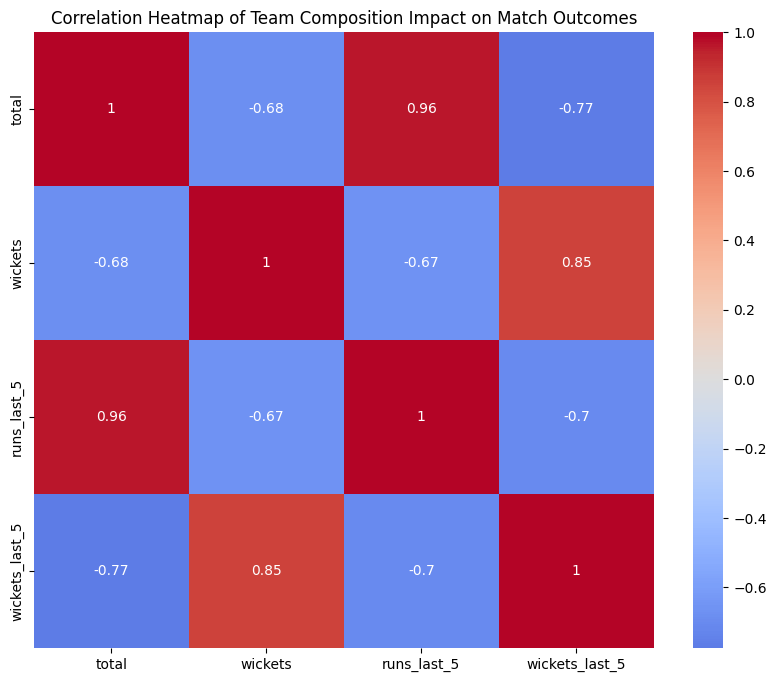

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate team composition impact on match outcomes

# Calculate win percentage for each team composition
team_composition_impact = df.groupby(['bat_team', 'bowl_team', 'venue']).agg({
    'total': 'mean',           # Average total runs scored
    'wickets': 'mean',         # Average wickets taken
    'runs_last_5': 'mean',     # Average runs scored in the last 5 overs
    'wickets_last_5': 'mean',  # Average wickets taken in the last 5 overs
}).reset_index()

# Calculate correlation matrix to understand impact on match outcomes
correlation_matrix = team_composition_impact.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Team Composition Impact on Match Outcomes")
plt.show()


The code calculates and visualizes the correlation between different factors of team composition (average total runs scored, wickets taken, runs scored in the last 5 overs, and wickets taken in the last 5 overs) and their impact on match outcomes using a heatmap.

**15.Data Visualization**: Use visualizations to present insights on player performance, match dynamics, and trends.

In [30]:
import pandas as pd
import plotly.express as px

# Match dynamics visualization: Runs and Wickets over Innings
match_dynamics = df.groupby(['mid', 'runs']).agg({
    'total': 'sum',
    'wickets': 'sum'
}).reset_index()

fig_match_dynamics = px.line(match_dynamics, x='mid', y='total', color='mid', title='Match Dynamics: Runs over Innings')

# Show the visualization
fig_match_dynamics.show()


This code uses Plotly Express to create a line plot visualization of match dynamics showing the runs scored over innings for each match.

#**CONCLUSION:**

In conclusion, this project has provided a comprehensive overview of IPL match dynamics, player and team performances, and predictive insights. By leveraging the power of data analysis and machine learning, we have gained valuable insights into cricket match outcomes, which can contribute to informed decision-making and enhanced strategies in the exciting world of cricket.